<a href="https://colab.research.google.com/github/GTkaren/MachineLearning_BigData/blob/main/Avia%C3%A7%C3%A3o_PySpark_e_MLIB_P%C3%B3s_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudo de caso com MLIB do PySpark**

**prof: Sergio Assuncao Monteiro, DSc**

lattes: http://lattes.cnpq.br/9489191035734025

# **Levantamento e preparação dos dados**

**Aquisição de Dados**

In [1]:
!pip install yfinance --upgrade --no-cache-dir

**Importar Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt


In [3]:
codigo = ['EMBR3.SA', 'AALL34.SA', 'AZUL4.SA', 'LTM.SN', 'GOLL4.SA', 'LTMAY', 'AF.PA', 'C6L.SI', 'SIA1.MU', 'SIA1.SG', 'SIA1.F','AFP.XC', '003490.KS', '003495.KS', 'BCO.DE', 'BCO.F', 'AIR.PA', 'AIR.DE', 'AIRA.SG', 'ADH2.SG']

In [ ]:
#codigo = ['EMBR3.SA', 'AALL34.SA', 'AZUL4.SA', 'LTM.SN', 'GOLL4.SA', 'LTMAY', 'AF.PA', 'C6L.SI', 'SIA1.MU', 'SIA1.SG', 'SIA1.F','AFP.XC', '003490.KS', '003495.KS', 'BCO.DE', 'BCO.F', 'AIR.PA', 'AIR.DE', 'AIRA.SG', 'ADH2.SG']

In [4]:
data_inicio = '2021-01-15'
data_fim    = '2022-01-01'

df_ativos = yf.download(codigo,
                        start = data_inicio,
                        end   = data_fim,
                        group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%%**********************]  20 of 20 completed


**Visualização dos dados**

In [5]:
with pd.option_context('display.max_rows',4):
  print(df_ativos)

           GOLL4.SA                                                     \
               Open       High    Low      Close  Adj Close     Volume   
Date                                                                     
2021-01-15    23.75  24.139999  23.24  23.549999  23.549999  7255600.0   
2021-01-18    24.01  24.940001  23.58  23.790001  23.790001  8911200.0   
...             ...        ...    ...        ...        ...        ...   
2021-12-30    16.98  17.320000  16.82  17.030001  17.030001  5503900.0   
2021-12-31      NaN        NaN    NaN        NaN        NaN        NaN   

           SIA1.MU                    ... ADH2.SG                           \
              Open  High   Low Close  ...     Low   Close Adj Close Volume   
Date                                  ...                                    
2021-01-15    2.68  2.68  2.68  2.68  ...  14.900  15.000    15.000  400.0   
2021-01-18    2.68  2.68  2.68  2.68  ...  14.500  14.900    14.900    0.0   
...            ..

In [6]:
df_ativos.describe()

GOLL4.SA                                                  \
             Open        High         Low       Close   Adj Close   
count  238.000000  238.000000  238.000000  238.000000  238.000000   
mean    21.366849   21.832017   20.882185   21.312941   21.312941   
std      3.067521    3.029835    3.039519    3.042132    3.042132   
min     15.010000   15.210000   14.580000   14.800000   14.800000   
25%     19.210000   19.742500   18.777500   19.062500   19.062500   
50%     21.260000   21.795000   20.875000   21.420000   21.420000   
75%     23.640000   24.147500   23.130000   23.600000   23.600000   
max     27.980000   28.750000   27.120001   27.590000   27.590000   

                        SIA1.MU                                      ...  \
             Volume        Open        High         Low       Close  ...   
count  2.380000e+02  246.000000  246.000000  246.000000  246.000000  ...   
mean   6.997192e+06    3.161504    3.165244    3.158902    3.162642  ...   
std    3.016808e+06    0.232064    0.230819    0.232837    0.231638  ...   
min    2.195500e+06    2.580000    2.580000    2.580000    2.580000  ...   
25%    5.148375e+06    3.080000    3.080000    3.080000    3.080000  ...   
50%    6.373350e+06    3.170000    3.170000    3.170000    3.170000  ...   
75%    7.925725e+06    3.315000    3.320000    3.295000    3.315000  ...   
max    2.459280e+07    3.520000    3.520000    3.520000    3.520000  ...   

          ADH2.SG                                            LTMAY  \
              Low       Close   Adj Close       Volume        Open   
count  246.000000  246.000000  246.000000   246.000000  243.000000   
mean    16.311650   16.482000   16.482000   195.666667    1.873169   
std      1.490734    1.481738    1.481738   609.623948    0.615818   
min     12.400000   12.800000   12.800000     0.000000    0.370000   
25%     15.397000   15.594000   15.594000     0.000000    1.615000   
50%     16.326000   16.550000   16.550000     0.000000    1.760000   
75%     17.374000   17.535500   17.535500    83.000000    2.350000   
max     19.600000   20.000000   20.000000  4988.000000    3.010000   

                                                                     
             High         Low       Close   Adj Close        Volume  
count  243.000000  243.000000  243.000000  243.000000  2.430000e+02  
mean     1.933045    1.809794    1.871481    1.871481  6.982457e+05  
std      0.627579    0.605877    0.616098    0.616098  1.190809e+06  
min      0.380000    0.280000    0.320000    0.320000  3.430000e+04  
25%      1.680000    1.580000    1.635000    1.635000  1.851000e+05  
50%      1.810000    1.720000    1.760000    1.760000  3.511000e+05  
75%      2.450000    2.300000    2.385000    2.385000  6.888000e+05  
max      3.050000    2.900000    3.000000    3.000000  1.065460e+07  

[8 rows x 120 columns]

In [ ]:
n=len(codigo)
n

20

In [7]:
def avaliar_desempenho(valor):
    if valor < 0:
        return 'ruim'
    elif valor < 10:
        return 'razoavel'
    elif valor < 15:
        return 'bom'
    else:
        return 'excelente'

In [10]:
data_inicio = '2021-01-15'
data_fim    = '2021-12-01'
dados=[]
for nome in codigo:
  coluna=df_ativos[nome,'Adj Close']
  media = coluna.mean()
  desvio_padrao = coluna.std()
  valor_inicio = coluna[data_inicio]
  valor_final = coluna[data_fim]
  retorno = ((valor_final-valor_inicio)/valor_inicio)*100
  avaliacao = avaliar_desempenho(retorno)
  registro = {'nome':nome,
              'media':media,
              'desvio padrao':desvio_padrao,
              'retorno':retorno,
              'avaliacao': avaliacao}
  dados.append(registro)
  print(f'ativo = {nome}; media = {media}; desvio padrão = {desvio_padrao}; ')
  print(f'valor inicial = {valor_inicio}; valor final = {valor_final}')
  print(f'retorno = {retorno:.2f}%')
  print(f'avaliacao = {avaliacao}')
df_ativos_transformados = pd.DataFrame(dados)

ativo = EMBR3.SA; media = 18.15512604272666; desvio padrão = 4.386199455888439; 
valor inicial = 9.520000457763672; valor final = 18.299999237060547
retorno = 92.23%
avaliacao = excelente
ativo = AALL34.SA; media = 110.72512637867646; desvio padrão = 12.052433162183076; 
valor inicial = 83.66000366210938; valor final = 92.7699966430664
retorno = 10.89%
avaliacao = bom
ativo = AZUL4.SA; media = 37.02033601488386; desvio padrão = 6.393181304222187; 
valor inicial = 37.41999816894531; valor final = 21.860000610351562
retorno = -41.58%
avaliacao = ruim
ativo = LTM.SN; media = 1392.424313493784; desvio padrão = 458.6794464119738; 
valor inicial = 1214.5; valor final = 210.94000244140625
retorno = -82.63%
avaliacao = ruim
ativo = GOLL4.SA; media = 21.312941230645702; desvio padrão = 3.0421317028192933; 
valor inicial = 23.549999237060547; valor final = 14.800000190734863
retorno = -37.15%
avaliacao = ruim
ativo = LTMAY; media = 1.8714814751481814; desvio padrão = 0.6160976401530657; 
valor i

In [11]:
df_ativos_transformados

,nome,media,desvio padrao,retorno,avaliacao
0,EMBR3.SA,18.155126,4.386199,92.226873,excelente
1,AALL34.SA,110.725126,12.052433,10.889305,bom
2,AZUL4.SA,37.020336,6.393181,-41.582037,ruim
3,LTM.SN,1392.424313,458.679446,-82.631535,ruim
4,GOLL4.SA,21.312941,3.042132,-37.154987,ruim
5,LTMAY,1.871481,0.616098,-80.487805,ruim
6,AF.PA,22.308272,2.488419,-25.295045,ruim
7,C6L.SI,4.747566,0.333005,9.794997,razoavel
8,SIA1.MU,2.913602,0.213398,17.537311,excelente
9,SIA1.SG,2.881901,0.220604,19.615382,excelente


# **(0.1) Pre-Requisitos**

In [12]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

# **(0.2) Configuracao das Variaveis de Ambiente**

In [13]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

# **01: Árvore de Classificação**

**Iniciar Spark**

In [14]:
import findspark
findspark.init()


**Importar os pacotes**

In [15]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

**Iniciar a sessão Spark**

In [16]:
spark = SparkSession.builder.appName("Decision Tree Model").getOrCreate()

**Carregar o conjunto de dados**

In [ ]:
df = spark.createDataFrame(df_ativos_transformados)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
df.show(5)

+---------+------------------+------------------+-------------------+---------+
|     nome|             media|     desvio padrao|            retorno|avaliacao|
+---------+------------------+------------------+-------------------+---------+
| EMBR3.SA| 19.96647479177004|1.7214635708403923| -19.11764615650409|     ruim|
|AALL34.SA|154.11615861282658|16.091351744940802|-26.529493239120665|     ruim|
| AZUL4.SA|36.793522286511624| 10.08512311756919|   41.0810831430796|excelente|
|   LTM.SN| 7532.650147970017|1207.7788019992968|   9.13714356711276| razoavel|
| GOLL4.SA|23.615242902083917|  8.86935772804679|  39.18751333950436|excelente|
+---------+------------------+------------------+-------------------+---------+
only showing top 5 rows



**Preparar os dados**

In [ ]:
# Convert the categorical labels in the 'avaliação' column to numerical values
label_indexer = StringIndexer(inputCol="avaliacao", outputCol="label")
data = label_indexer.fit(df).transform(df)

# Assemble the feature columns into a single vector column
assembler = VectorAssembler(inputCols=["media", "desvio padrao", "retorno"], outputCol="features")
data = assembler.transform(data)

# Split data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=667)

**Treinar o modelo de árvore de decisão**

In [ ]:
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")

model = dt_classifier.fit(train_data)

**Avaliar a qualidade da classificação com os dados de teste**

In [ ]:
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.75


 **Analisar a Importância de Cada Característica para Classificação**

In [ ]:
feature_importance = model.featureImportances.toArray()

# Show feature importance
for i, column in enumerate(assembler.getInputCols()):
    print(f"Feature '{column}': {feature_importance[i]:.2f}")

Feature 'media': 0.00
Feature 'desvio padrao': 0.00
Feature 'retorno': 1.00


**Visualizar a Árvore de Decisão**

In [ ]:
print(model.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_98566a64dc7d, depth=3, numNodes=7, numClasses=4, numFeatures=3
  If (feature 2 <= 13.736542627419256)
   If (feature 2 <= 0.7758092151603048)
    Predict: 1.0
   Else (feature 2 > 0.7758092151603048)
    If (feature 2 <= 7.200364533930761)
     Predict: 2.0
    Else (feature 2 > 7.200364533930761)
     Predict: 3.0
  Else (feature 2 > 13.736542627419256)
   Predict: 0.0



**Salvar e  carregar o modelo (opcional)**

In [ ]:
# Save the model
model.save("Dtree_model")

# Load the model
from pyspark.ml.classification import DecisionTreeClassificationModel
loaded_model = DecisionTreeClassificationModel.load("Dtree_model")

**Fechar a Sessão Spark**

In [ ]:
spark.stop()

# **02: Clusterização**

**Iniciar a Sessão Spark**

In [17]:
import findspark
findspark.init()
from pyspark import SparkFiles
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("Mastering K-means Clustering with PySpark MLlib").getOrCreate()

**Carregar os dados**

In [18]:
df = spark.createDataFrame(df_ativos_transformados)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [19]:
df.show(5)

+---------+------------------+------------------+------------------+---------+
|     nome|             media|     desvio padrao|           retorno|avaliacao|
+---------+------------------+------------------+------------------+---------+
| EMBR3.SA| 18.15512604272666| 4.386199455888439| 92.22687349911504|excelente|
|AALL34.SA|110.72512637867646|12.052433162183076|10.889305022924662|      bom|
| AZUL4.SA| 37.02033601488386| 6.393181304222187|-41.58203719931478|     ruim|
|   LTM.SN| 1392.424313493784| 458.6794464119738| -82.6315354103412|     ruim|
| GOLL4.SA|21.312941230645702|3.0421317028192933|-37.15498653841076|     ruim|
+---------+------------------+------------------+------------------+---------+
only showing top 5 rows



In [20]:
#Print schema
df.printSchema()


root
 |-- nome: string (nullable = true)
 |-- media: double (nullable = true)
 |-- desvio padrao: double (nullable = true)
 |-- retorno: double (nullable = true)
 |-- avaliacao: string (nullable = true)



**Processar Dados**

In [21]:
# Assembling features into a single column
assembler = VectorAssembler(inputCols=["media", "desvio padrao", "retorno"],
                            outputCol="features")
data_df = assembler.transform(df)

# Scaling the features
scaler = StandardScaler(inputCol="features",
                        outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

data_df.show(5)

+---------+------------------+------------------+------------------+---------+--------------------+--------------------+
|     nome|             media|     desvio padrao|           retorno|avaliacao|            features|     scaled_features|
+---------+------------------+------------------+------------------+---------+--------------------+--------------------+
| EMBR3.SA| 18.15512604272666| 4.386199455888439| 92.22687349911504|excelente|[18.1551260427266...|[0.00171278711951...|
|AALL34.SA|110.72512637867646|12.052433162183076|10.889305022924662|      bom|[110.725126378676...|[0.01044600680941...|
| AZUL4.SA| 37.02033601488386| 6.393181304222187|-41.58203719931478|     ruim|[37.0203360148838...|[0.00349256482919...|
|   LTM.SN| 1392.424313493784| 458.6794464119738| -82.6315354103412|     ruim|[1392.42431349378...|[0.13136380454965...|
| GOLL4.SA|21.312941230645702|3.0421317028192933|-37.15498653841076|     ruim|[21.3129412306457...|[0.00201070106221...|
+---------+------------------+--

**Encontrar a Quantidade Ótima de Clusters**

In [22]:
# Computing WSSSE for K values from 2 to 8
wssse_values =[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaled_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,8):
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)
    KMeans_fit = KMeans_mod.fit(data_df)
    output = KMeans_fit.transform(data_df)
    score = evaluator.evaluate(output)
    wssse_values.append(score)
    print("Silhouette Score:",score)

Silhouette Score: 0.9035635328568675
Silhouette Score: 0.7564624732946281
Silhouette Score: 0.7505545753461987
Silhouette Score: 0.8475595987871444
Silhouette Score: 0.7546281927380643
Silhouette Score: 0.6700840812158219


**Imprimir o gráfico**

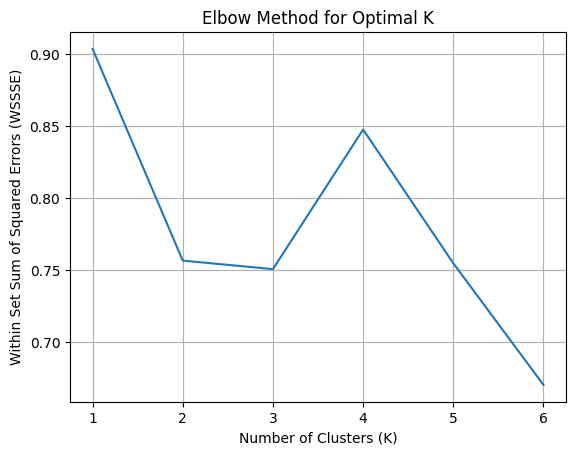

In [23]:
# Plotting WSSSE values
plt.plot(range(1, 7), wssse_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

**Executar o K-Means**

In [24]:
# Define the K-means clustering model
kmeans = KMeans(k=4,
                featuresCol="scaled_features",
                predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

# Assigning the data points to clusters
clustered_data = kmeans_model.transform(data_df)

**Avaliar o modelo**

In [25]:
output = KMeans_fit.transform(data_df)
wssse = evaluator.evaluate(output)
print(f"Within Set Sum of Squared Errors (WSSSE) = {wssse}")

Within Set Sum of Squared Errors (WSSSE) = 0.6700840812158219


**Visualizar os Resultados**

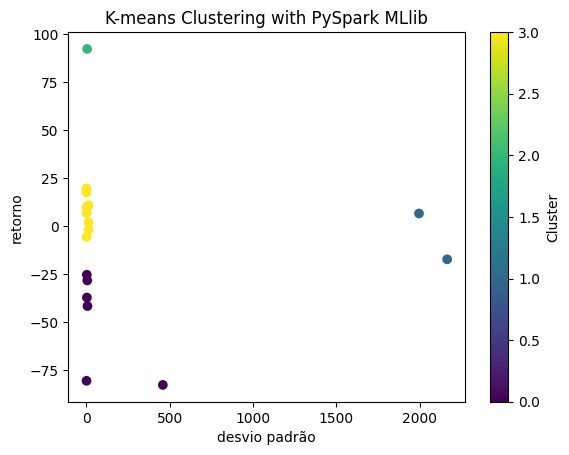

In [26]:
# Converting to Pandas DataFrame
clustered_data_pd = clustered_data.toPandas()

# Visualizing the results
plt.scatter(#clustered_data_pd["media"],
            clustered_data_pd["desvio padrao"],
            clustered_data_pd["retorno"],
            c=clustered_data_pd["cluster"],
            cmap='viridis')
plt.xlabel("desvio padrão")
plt.ylabel("retorno")
plt.title("K-means Clustering with PySpark MLlib")
plt.colorbar().set_label("Cluster")
plt.show()

**Fechar a Sessão Spark**

In [ ]:
spark.stop()

# **03: Regressão Linear**

**Importar e iniciar Spark**

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark import SparkFiles
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

spark = SparkSession.builder \
    .appName("Linear Regression with PySpark MLlib") \
    .getOrCreate()

**Carregar os dados**

In [ ]:
df = spark.createDataFrame(df_ativos_transformados)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
df.show(5)

+--------+------------------+------------------+-------------------+---------+
|    nome|             media|     desvio padrao|            retorno|avaliacao|
+--------+------------------+------------------+-------------------+---------+
|ABEV3.SA|14.294048038482666|0.7527090592642329|-12.295402865547423|     ruim|
|AZUL4.SA| 18.76729996776581| 7.229579557764142| -61.64637310931158|     ruim|
|B3SA3.SA|12.424586908340455|1.3506636516743074| -2.295204641142229|     ruim|
|BBAS3.SA| 34.30561730194092| 6.851844224818951|  81.16952311653337|excelente|
|BBDC3.SA| 13.85203917503357|1.2387044779053642| -18.89662933283917|     ruim|
+--------+------------------+------------------+-------------------+---------+
only showing top 5 rows



**Preparar os dados**

In [ ]:
assembler = VectorAssembler(
    inputCols=["media", "desvio padrao"],
    outputCol="features")

df = assembler.transform(df)
final_data = df.select("features", "retorno")

train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=667)

In [ ]:
df.show(5)

+--------+------------------+------------------+-------------------+---------+--------------------+
|    nome|             media|     desvio padrao|            retorno|avaliacao|            features|
+--------+------------------+------------------+-------------------+---------+--------------------+
|ABEV3.SA|14.294048038482666|0.7527090592642329|-12.295402865547423|     ruim|[14.2940480384826...|
|AZUL4.SA| 18.76729996776581| 7.229579557764142| -61.64637310931158|     ruim|[18.7672999677658...|
|B3SA3.SA|12.424586908340455|1.3506636516743074| -2.295204641142229|     ruim|[12.4245869083404...|
|BBAS3.SA| 34.30561730194092| 6.851844224818951|  81.16952311653337|excelente|[34.3056173019409...|
|BBDC3.SA| 13.85203917503357|1.2387044779053642| -18.89662933283917|     ruim|[13.8520391750335...|
+--------+------------------+------------------+-------------------+---------+--------------------+
only showing top 5 rows



In [ ]:
train_data.show(5)

+--------------------+-------------------+
|            features|            retorno|
+--------------------+-------------------+
|[5.32562000989913...| -85.22483969286378|
|[8.27509716320037...|   3.91466181602118|
|[10.8681500368118...| 16.874460280635493|
|[12.4245869083404...| -2.295204641142229|
|[16.2879733295440...|-21.266956675314894|
+--------------------+-------------------+
only showing top 5 rows



In [ ]:
train_data.describe().show()

+-------+------------------+
|summary|           retorno|
+-------+------------------+
|  count|                28|
|   mean|1.5790399067329426|
| stddev|   56.704127296855|
|    min|-85.22483969286378|
|    max| 182.1818059878641|
+-------+------------------+



In [ ]:
type(train_data)

pyspark.sql.dataframe.DataFrame

In [ ]:
train_data.count()

28

In [ ]:
test_data.count()

7

**Construir o modelos de Regressão Linear**

In [ ]:
lr = LinearRegression(featuresCol="features",
                      labelCol="retorno",
                      predictionCol="previsao")
lr_model = lr.fit(train_data)

In [ ]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))

Coefficients:  [1.70744583197624,-4.112660064182628]
Intercept: -19.455


**Realizar predições e avaliar o modelo**

In [ ]:
test_data.show(5)

+--------------------+-------------------+
|            features|            retorno|
+--------------------+-------------------+
|[11.5495242872238...| -48.45413445387851|
|[13.8520391750335...| -18.89662933283917|
|[14.2940480384826...|-12.295402865547423|
|[21.8712961177825...| 176.37006397490512|
|[30.1973399581909...| 149.16800998414638|
+--------------------+-------------------+
only showing top 5 rows



In [ ]:
predictions = lr_model.transform(test_data)

evaluator = RegressionEvaluator(labelCol="retorno",
                                predictionCol="previsao",
                                metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

evaluator_r2 = RegressionEvaluator(labelCol="retorno",
                                   predictionCol="previsao",
                                   metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

Root Mean Squared Error (RMSE) on test data: 97.964
R-squared (R2) on test data: -0.346


In [ ]:
predictions.show(5)

+--------------------+-------------------+-------------------+
|            features|            retorno|           previsao|
+--------------------+-------------------+-------------------+
|[11.5495242872238...| -48.45413445387851|-17.708743901307326|
|[13.8520391750335...| -18.89662933283917|-0.8981237224769387|
|[14.2940480384826...|-12.295402865547423|  1.855316418736873|
|[21.8712961177825...| 176.37006397490512| -6.412033569391028|
|[30.1973399581909...| 149.16800998414638| 1.2785436687354057|
+--------------------+-------------------+-------------------+
only showing top 5 rows



**Analisar o modelo**

In [ ]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))

Coefficients:  [1.70744583197624,-4.112660064182628]
Intercept: -19.455


**Analisar a importância da característica**

In [ ]:
feature_importance = sorted(list(zip(data.columns[:-1], map(abs, coefficients))), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in feature_importance:
    print("  {}: {:.3f}".format(feature, importance))

Feature Importance:
  media: 4.113
  nome: 1.707


**Salvar e carregar o modelo**

In [ ]:
# Save the model
lr_model.save("lr_model")

# Load the model
from pyspark.ml.regression import LinearRegressionModel
loaded_model = LinearRegressionModel.load("lr_model")

**Fechar a Sessão Spark**

In [ ]:
spark.stop()

# **Exemplo Regressão Linear no ScikitLearn**

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


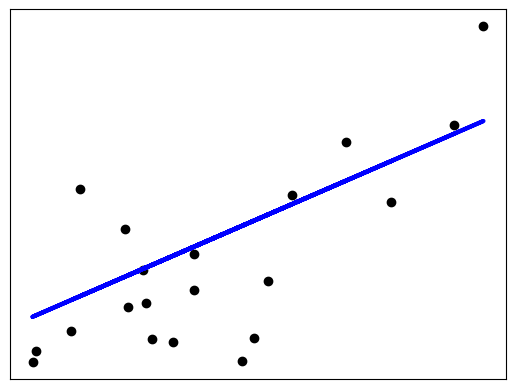

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **Árvore de Decisão no ScikitLearn**

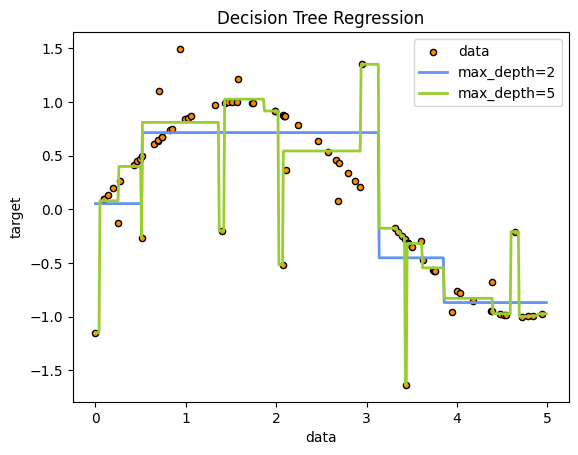

In [ ]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()